In [1]:
from simulator import k_sequence_WH_worker
from network_statistics import WH_cmp
from numpy import log, floor, mean
from tqdm import tqdm
from multiprocessing import Pool
import matplotlib.pyplot as plt
WH = [(m, K) for K in range(10, 91, 20) for m in range(1, 3*int(floor(log(K))), 2)]
WH = [x for i, x in enumerate(WH) if not any((WH_cmp(x, y) and WH_cmp(y, x) for y in WH[:i]))]

print(WH)

[(1, 10), (3, 10), (5, 10), (1, 30), (3, 30), (5, 30), (7, 30), (1, 50), (3, 50), (5, 50), (7, 50), (1, 70), (3, 70), (5, 70), (7, 70), (9, 70), (11, 70), (1, 90), (3, 90), (5, 90), (7, 90), (9, 90), (11, 90)]


In [ ]:
pool = Pool()

for _ in tqdm(pool.imap_unordered(k_sequence_WH_worker, WH), total=len(WH)):
    pass
pool.close()
pool.join()

 48%|████▊     | 30/63 [36:37<40:17, 73.25s/it]

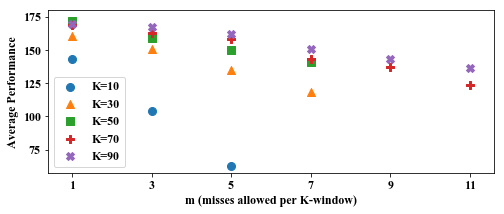

In [30]:
def scan_result(m, K):
    with open('WH-traces/%03d_%03d_result.txt' % (K, m)) as f:
        data = eval(f.read())
    return data
def marker():
    markers = ["o", "^", "s", "P", "X"]
    for marker in markers:
        yield marker
WH_performance = list(map(lambda WH_i: (WH_i, mean(scan_result(*WH_i))), WH))
marker_gen = marker()
plt.figure(figsize=(8,3))
plt.rc('font', family='Times New Roman', size=12)
plt.rc('scatter', marker='+')
plt.rc('lines', markersize=8)

for K in range(10, 91, 20):
    plt.scatter(*zip(*map(lambda x: (x[0][0], x[1]), filter(lambda x: x[0][1] == K, WH_performance))),
                marker=next(marker_gen))
plt.legend(list(map(lambda x: 'K=%d' % x, range(10, 91, 20))))
plt.xlabel('m (misses allowed per K-window)')
plt.ylabel('Average Performance')
plt.xticks(range(1, 12, 2))
plt.savefig('weakly-hard-control-experiment.svg')
plt.show()